In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2


In [3]:
from draw3d import *

In [5]:
import vectors as V

import math

In [4]:
def to_rad(angle):
	return angle / 180 * math.pi

Draw the 3D arrow and point representing the coordinates (–1, –2, 2) as well as the dashed box that makes the arrow look 3D. Do this draw- ing by hand for practice, but from now on, we’ll use Python to draw for us.

/Users/artemputilov/py/stuff/Math-for-Programmers/Chapter 03/draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


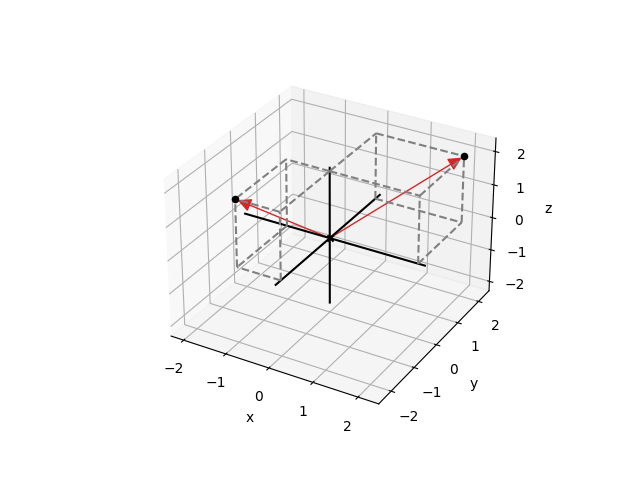

In [5]:
def ex31():
	v2 = (-1, -2, 2)
	v1 = (2, 2, 2)
	
	draw3d(Points3D(v1,v2), Arrow3D(v1), Arrow3D(v2), Box3D(*v1), Box3D(*v2))
ex31()


## Ex 3.2
There are exactly eight 3D vectors whose coordi- nates are all either +1 or –1. For instance, (1, –1, 1) is one of these. Plot all of these eight vectors as points. Then figure out how to connect them with line seg- ments using Segment3D objects to form the outline of a cube.

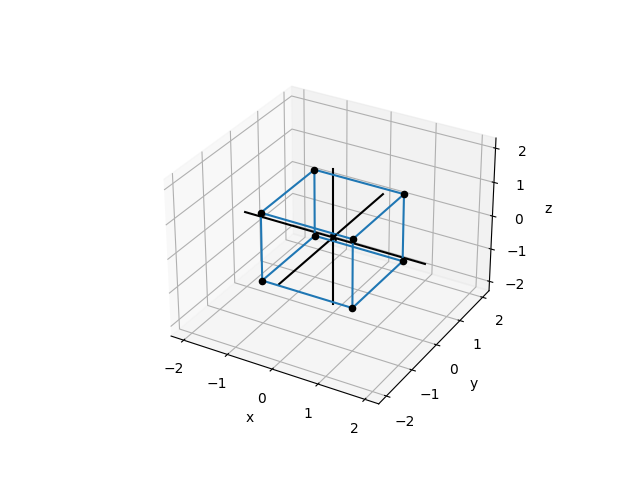

In [6]:
from itertools import permutations, combinations, product, tee, pairwise, chain

var = (1, -1)


def ex32():
    pp = [(x, y, z) for x in var for z in var for y in var]

    ss = chain([Segment3D((1, y, z), (-1, y, z)) for y in var for z in var],
               [Segment3D((x, 1, z), (x, -1, z)) for x in var for z in var],
               [Segment3D((x, y, 1), (x, y, -1)) for x in var for y in var])
    draw3d(Points3D(*pp), *ss)


ex32()


In [7]:
u = (1,2,2)
V.length(u)
v = V.scale(7/3, u)
V.length(v)
V.dot(u,v)

v_rev = V.scale(-1, v)
V.dot(u, v_rev)

u_list = [(1,2,2), (2,1,2), (2,2,1)]



In [8]:

def get_dot_prod(u_len, v_len, angle):
	uv_len_prod = u_len * v_len
	cos = math.cos(to_rad(angle))
	uv_dot_prod = cos * uv_len_prod
	return uv_dot_prod

u_len = 3.61
v_len = 1.44
angle = 101.3
get_dot_prod(u_len, v_len, angle)


-1.0186064362303022

## Ex 3.3
Draw (4, 0, 3) and (–1, 0, 1) as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?

/Users/artemputilov/py/stuff/Math-for-Programmers/Chapter 03/draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


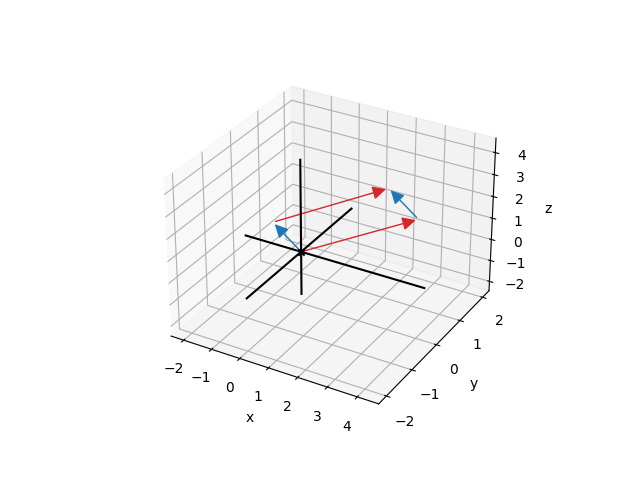

In [11]:
a = (4,0,3)
b = (-1,0,1)
c = V.add(a,b)

vv = [
	Arrow3D(a, color=red),
	Arrow3D(c, a, color=blue),
	Arrow3D(b, color=blue),
	Arrow3D(c, b, color=red)
]
draw3d(*vv)

## Exercise 3.5—Mini Project 
The following comprehension creates a list of 24 Python vectors:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D objects.

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


/Users/artemputilov/py/stuff/Math-for-Programmers/Chapter 03/draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


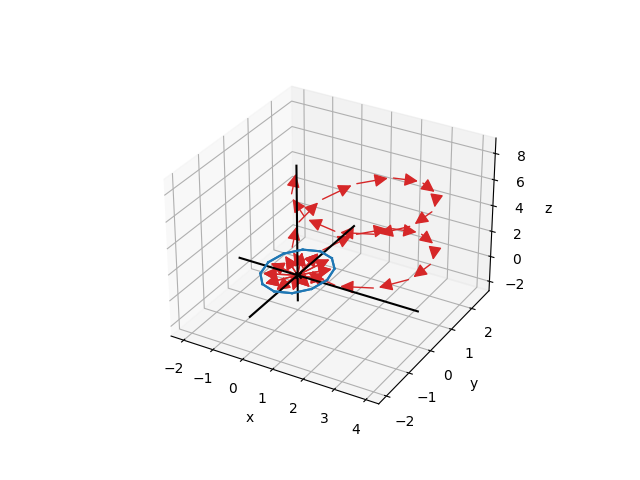

In [25]:
from math import sin, cos, pi

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
s = V.add(*vs)
print(s)
arrows = [Segment3D(vs[x], vs[x+1]) for x in range(-1, len(vs)-1)]
lines = [Arrow3D(x, (0, 0, 0)) for x in vs]
rs = (0, 0, 0)
hel = []
for v in vs:
	tmp = rs
	rs = V.add(rs, v)
	hel.append(Arrow3D(rs, tmp))
	

draw3d(*(lines + arrows + hel))

### Exercise 3.9—Mini Project 
The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number. Find a different triple of whole numbers that define coordinates of a vector with a whole number length.

In [ ]:
def find_triples(limit=1_000_000):
	sieve = []
	for x in range(1, limit):
		q = x*x
		sieve.append(q)
		if q >= limit:
			break
		




In [10]:
from itertools import combinations_with_replacement, product, combinations, permutations


print("product: ", list(product('ABC', 'ABC', 'ABC')))
print("permutations: ", list(permutations('ABC', 3)))
print("combinations: ", list(combinations('ABC', 1)))
print("combinations with rep: ", list(combinations_with_replacement(range(3), 3)))

def iter_triples(limit=100):

	for x in range(1, limit):
		for y in range(1, x+1):
			for z in range(1, y+1):
				yield (x, y, z)
print("len of triples: ", len(list(iter_triples(10))))
print("len of permutations: ", len(list(permutations(range(1, 10), 3))))
print("len of combinations: ", len(list(combinations(range(1, 10), 3))))
print("len of combinations with rep: ", len(list(combinations_with_replacement(range(1, 10), 3))))

product:  [('A', 'A', 'A'), ('A', 'A', 'B'), ('A', 'A', 'C'), ('A', 'B', 'A'), ('A', 'B', 'B'), ('A', 'B', 'C'), ('A', 'C', 'A'), ('A', 'C', 'B'), ('A', 'C', 'C'), ('B', 'A', 'A'), ('B', 'A', 'B'), ('B', 'A', 'C'), ('B', 'B', 'A'), ('B', 'B', 'B'), ('B', 'B', 'C'), ('B', 'C', 'A'), ('B', 'C', 'B'), ('B', 'C', 'C'), ('C', 'A', 'A'), ('C', 'A', 'B'), ('C', 'A', 'C'), ('C', 'B', 'A'), ('C', 'B', 'B'), ('C', 'B', 'C'), ('C', 'C', 'A'), ('C', 'C', 'B'), ('C', 'C', 'C')]
permutations:  [('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]
combinations:  [('A',), ('B',), ('C',)]
combinations with rep:  [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 1), (0, 1, 2), (0, 2, 2), (1, 1, 1), (1, 1, 2), (1, 2, 2), (2, 2, 2)]
len of triples:  165
len of permutations:  504
len of combinations:  84
len of combinations with rep:  165
